C:\Users\.PY\anaconda3\envs\pandas_playground\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


C:\Users\.PY\anaconda3\envs\pandas_playground\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 81ms/step - accuracy: 0.2453 - loss: 2.2647 - val_accuracy: 0.3698 - val_loss: 1.9647
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 86ms/step - accuracy: 0.3969 - loss: 1.6492 - val_accuracy: 0.5375 - val_loss: 1.3048
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.4489 - loss: 1.5239 - val_accuracy: 0.4197 - val_loss: 1.7287
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 87ms/step - accuracy: 0.4908 - loss: 1.4272 - val_accuracy: 0.4279 - val_loss: 1.9734
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.5139 - loss: 1.3652 - val_accuracy: 0.5071 - val_loss: 1.4739
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 87ms/step - accuracy: 0.5357 - loss: 1.3065 - val_accuracy: 0.5214 - val_loss: 1.4867
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 90ms/step - accuracy: 0.5540 - loss: 1.2631 - val_accuracy: 0.6133 - val_loss: 1.0629
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 90ms/step - accuracy: 0.5630 - loss: 1.2415 - val_

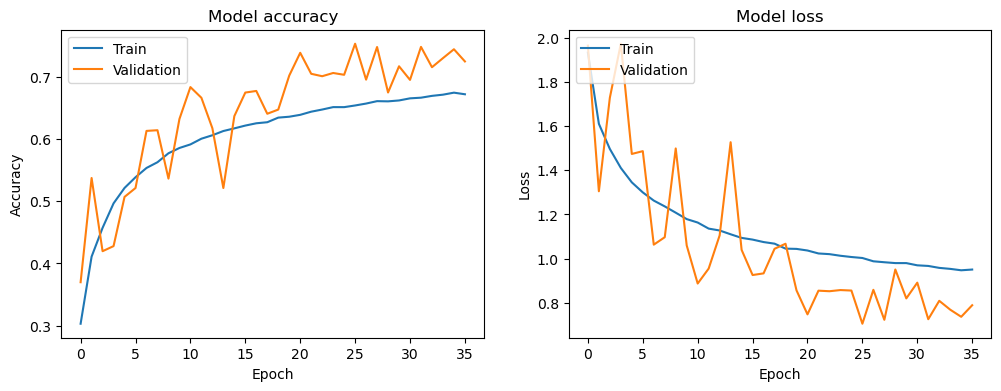

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


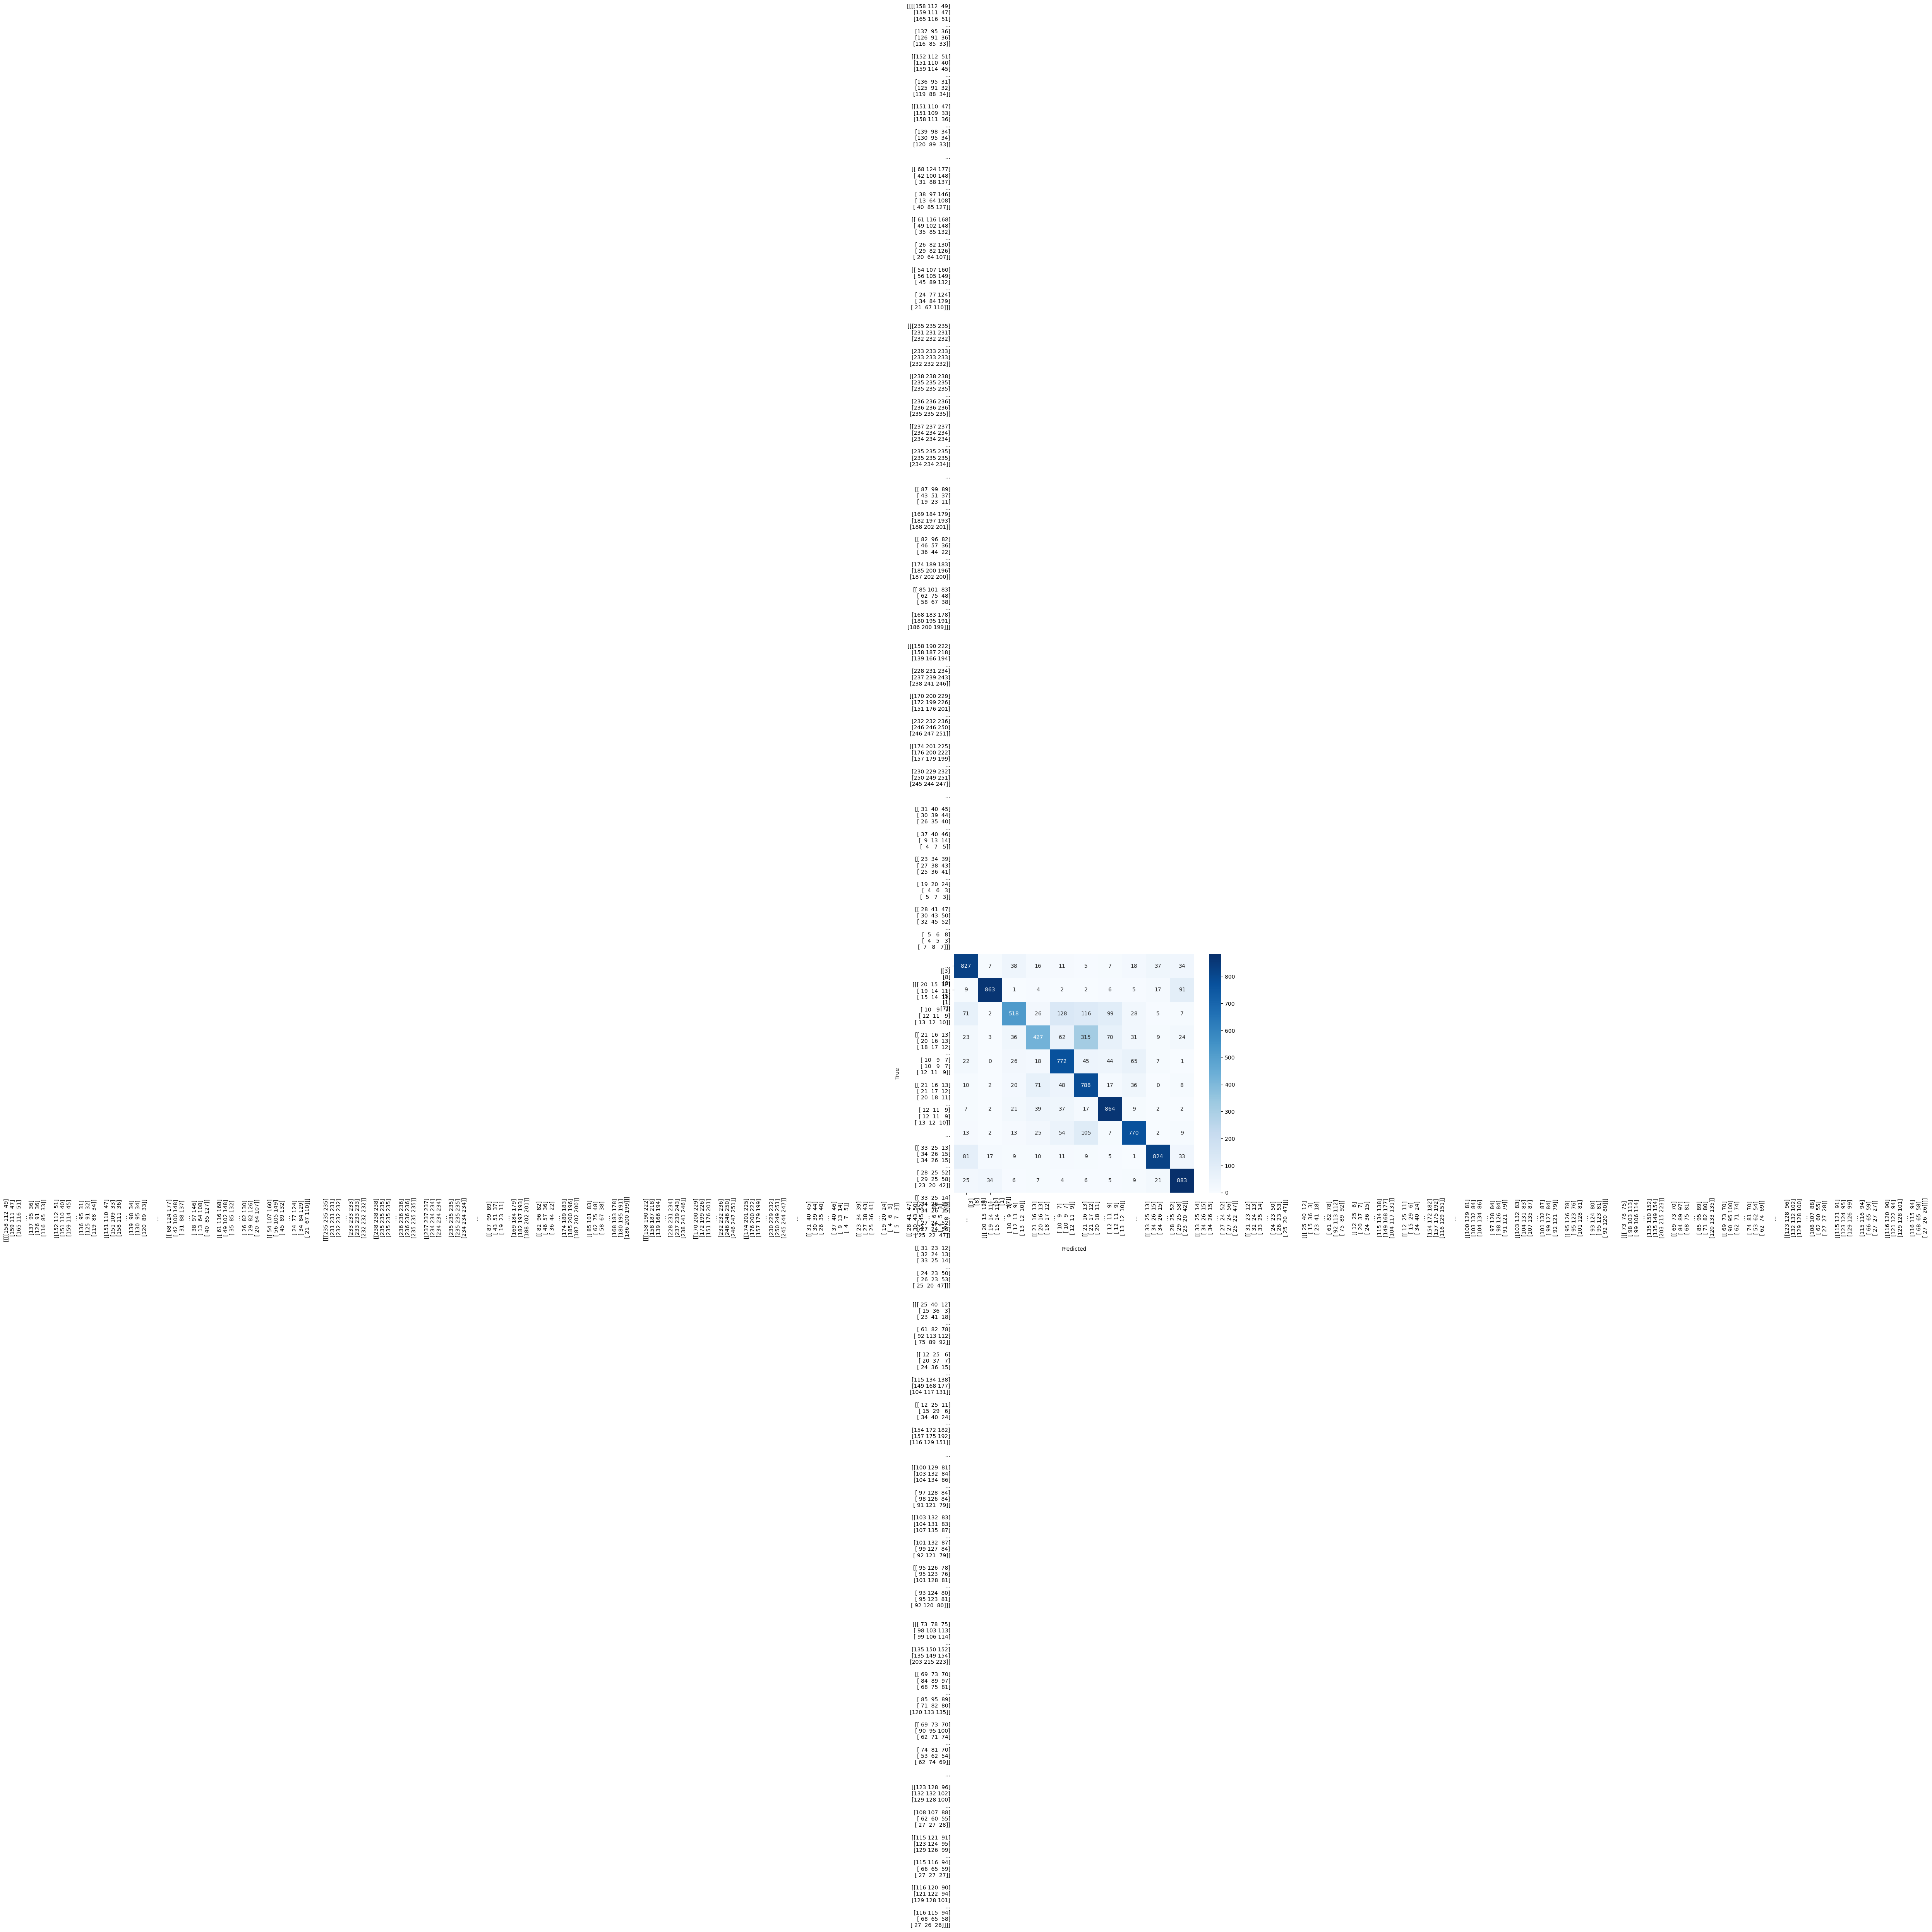

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the image data to range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convert the labels to one-hot vectors
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Define the CNN architecture
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

# Flatten the output and add fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer with softmax activation for multi-class classification
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set up data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(train_images)


# Set up callbacks
# Set up callbacks
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Train the model
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=100,
    validation_data=(test_images, test_labels),
    callbacks=[checkpoint, early_stop]
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc:.3f}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Generate and visualize confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the labels of the test set
pred_labels = model.predict(test_images)
pred_labels = np.argmax(pred_labels, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cifar10.load_data()[1], yticklabels=cifar10.load_data()[1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Documenting the CNN Architecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=True)







# Analyze the model's performance
# - Observe overfitting if any (difference between training and validation accuracy/loss)
# - Effectiveness of dropout layers and data augmentation can be assessed by comparing training with and without them.


